In [40]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

## Data importing and preprocessing

In [41]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)      

## Network Creation

In [42]:
# Creating networks and stroing them

graphs = []
for i in excel_list:
    path = "Raw_Data/"+i
    if(i=="0815.csv"):
        excel = pd.read_csv(path ,header=0, usecols = [0,1,2,3] ,names=["city1","city2","to","from"] )
        G = nx.DiGraph()
        print(path)
        for i in range(1,len(excel)):
            weight1 = excel["to"][i]
            weight2 = excel["from"][i]
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        graphs.append(G)
    else:
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        G = nx.DiGraph()
        print(path)
        for i in range(1,len(excel)+1):
            weight1 = excel["to"][i]
            weight2 = excel["from"][i]
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        graphs.append(G)

Raw_Data/0116.csv
Raw_Data/0117.csv
Raw_Data/0118.csv
Raw_Data/0119.csv
Raw_Data/0120.csv
Raw_Data/0216.csv
Raw_Data/0217.csv
Raw_Data/0218.csv
Raw_Data/0219.csv
Raw_Data/0220.csv
Raw_Data/0316.csv
Raw_Data/0317.csv
Raw_Data/0318.csv
Raw_Data/0319.csv
Raw_Data/0320.csv
Raw_Data/0416.csv
Raw_Data/0417.csv
Raw_Data/0418.csv
Raw_Data/0419.csv
Raw_Data/0420.csv
Raw_Data/0515.csv
Raw_Data/0516.csv
Raw_Data/0517.csv
Raw_Data/0518.csv
Raw_Data/0519.csv
Raw_Data/0520.csv
Raw_Data/0615.csv
Raw_Data/0616.csv
Raw_Data/0617.csv
Raw_Data/0618.csv
Raw_Data/0619.csv
Raw_Data/0620.csv
Raw_Data/0715.csv
Raw_Data/0716.csv
Raw_Data/0717.csv
Raw_Data/0718.csv
Raw_Data/0719.csv
Raw_Data/0720.csv
Raw_Data/0815.csv
Raw_Data/0816.csv
Raw_Data/0817.csv
Raw_Data/0818.csv
Raw_Data/0819.csv
Raw_Data/0820.csv
Raw_Data/0915.csv
Raw_Data/0916.csv
Raw_Data/0917.csv
Raw_Data/0918.csv
Raw_Data/0919.csv
Raw_Data/0920.csv
Raw_Data/1015.csv
Raw_Data/1016.csv
Raw_Data/1017.csv
Raw_Data/1018.csv
Raw_Data/1019.csv
Raw_Data/1

## Network Visualization

In [43]:
print(graphs[1].nodes())

['AGARTALA', 'CHENNAI', 'AGATTI ISLAND', 'KOCHI', 'AGRA', 'DELHI', 'KHAJURAHO', 'VARANASI', 'AHMEDABAD', 'BENGALURU', 'COIMBATORE', 'GOA', 'GUWAHATI', 'HYDERABAD', 'JAIPUR', 'KOLKATA', 'LUCKNOW', 'MUMBAI', 'NAGPUR', 'PUNE', 'VISAKHAPATNAM', 'AIZAWL', 'IMPHAL', 'AMRITSAR', 'BAGDOGRA', 'BELGAUM', 'JABALPUR', 'CHANDIGARH', 'DEHRA DUN', 'HUBLI', 'INDORE', 'JODHPUR', 'JORHAT', 'KOZHIKODE', 'MADURAI', 'MANGALORE', 'PATNA', 'PORT BLAIR', 'RAIPUR', 'RAJAHMUNDRY', 'RAJKOT', 'RANCHI', 'SRINAGAR', 'TRIVANDRUM', 'VIJAYAWADA', 'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBANESWAR', 'BHUJ', 'LEH', 'TIRUCHIRAPALLY', 'TUTICORIN', 'TIRUPATI', 'ALLAHABAD', 'AURANGABAD', 'DHARAMSALA', 'DIBRUGARH', 'DIMAPUR', 'GAYA', 'JAMMU', 'KANPUR', 'KULLU', 'PANTNAGAR', 'SURAT', 'UDAIPUR', 'LILABARI', 'SILCHAR', 'TEZPUR', 'SHILLONG', 'DIU', 'GWALIOR', 'JAMNAGAR', 'VADODARA']


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  4., 26., 11., 24.]),
 array([  6. ,  15.7,  25.4,  35.1,  44.8,  54.5,  64.2,  73.9,  83.6,
         93.3, 103. ]),
 <BarContainer object of 10 artists>)

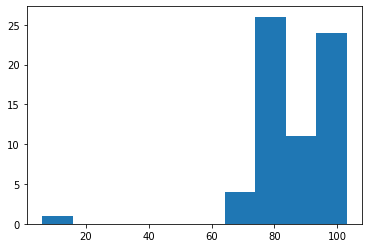

In [50]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.hist(nodes)